# PART 2 - This code will not run without PART 1
## Where Do You Get EPSG Codes?
Website: https://epsg.io
Search "Austria projection"

Example: MGI / Austria Lambert → EPSG:31287

To use: gdf.to_crs(epsg=31287) or gdf.set_crs(epsg=31287, inplace=True) if not defined

## Visualizing Vector Data in Urban Environments
Introduction:
Visualization is one of the most powerful tools in urban data science. It allows us to visually interpret spatial patterns, identify outliers, and communicate urban insights effectively to both technical and non-technical audiences.

In this section, we’ll explore how to visualize vector data — such as administrative boundaries and buildings — using static and interactive Python tools.

Conceptual Notes on Vector Data Visualization

| Tool         | Use Case                             | Output Type         |
| ------------ | ------------------------------------ | ------------------- |
| `GeoPandas`  | Basic static maps (points, polygons) | Matplotlib plots |
| `Matplotlib` | Styling and layering of plots        | Static plots     |
| `Folium`     | Interactive maps with zoom, tooltips | Web map          |
| `Contextily` | Basemap tiles with vector overlays   | Map backgrounds |


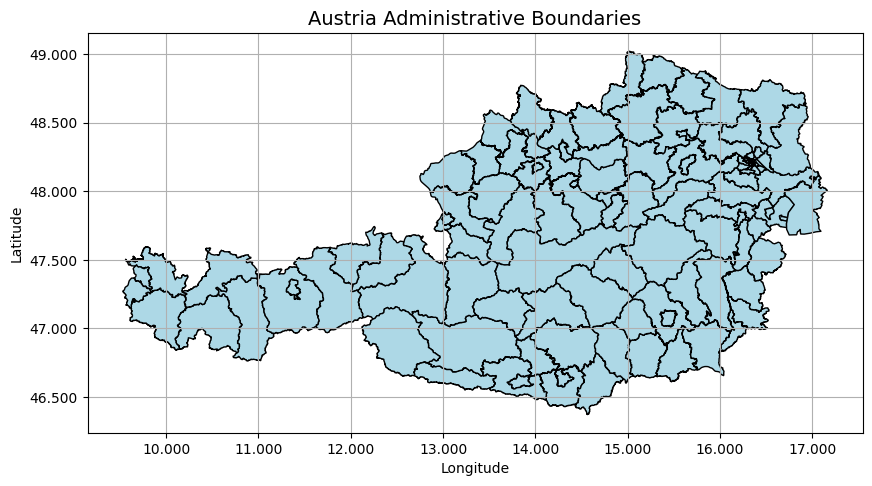

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, figsize=(10, 10))
admin_boundaries.plot(ax=ax, color='lightblue', edgecolor='black')

ax.set_title("Austria Administrative Boundaries", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Format ticks to 3 decimals
from matplotlib.ticker import FuncFormatter
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x:.3f}"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x:.3f}"))

plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Create the figure and axis
fig, ax = plt.subplots(1, figsize=(10, 10))

# Plot Austria's administrative boundaries
admin_boundaries.plot(ax=ax, color='lightblue', edgecolor='black')

# Title and axis labels
ax.set_title("Austria Administrative Boundaries", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Format tick labels to 3 decimal places
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x:.3f}"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x:.3f}"))

# -------------------------------
# Add a scale bar (simple version)
# -------------------------------
# Define scalebar position and size
scalebar_length_km = 50  # length of scalebar in kilometers
scalebar_lon = ax.get_xlim()[0] + 0.1  # X position (slightly right from left edge)
scalebar_lat = ax.get_ylim()[0] + 0.1  # Y position (slightly above bottom)

# Approximate conversion for degrees longitude to km at Austria's latitude (~47°N)
# 1 degree longitude ≈ 111.32 km * cos(latitude)
km_per_degree_lon = 111.32 * abs(np.cos(np.radians(47)))
scalebar_length_deg = scalebar_length_km / km_per_degree_lon

# Draw the scalebar as a thick black line
ax.plot([scalebar_lon, scalebar_lon + scalebar_length_deg],
        [scalebar_lat, scalebar_lat],
        color='black', linewidth=3)

# Add scalebar label
ax.text(scalebar_lon + scalebar_length_deg / 2, scalebar_lat + 0.05,
        f"{scalebar_length_km} km", ha='center', va='bottom', fontsize=10)

# -------------------------------
# Add a north arrow
# -------------------------------
# Position of the arrow (near top-left corner of the plot)
arrow_x = ax.get_xlim()[0] + 0.15
arrow_y = ax.get_ylim()[1] - 0.2

# Draw the arrow (pointing straight up)
ax.annotate('N', xy=(arrow_x, arrow_y), xytext=(arrow_x, arrow_y - 0.5),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=12, fontweight='bold')

# Show grid
plt.grid(True)

# Display the plot
plt.show()


## Now Lets add some more layers

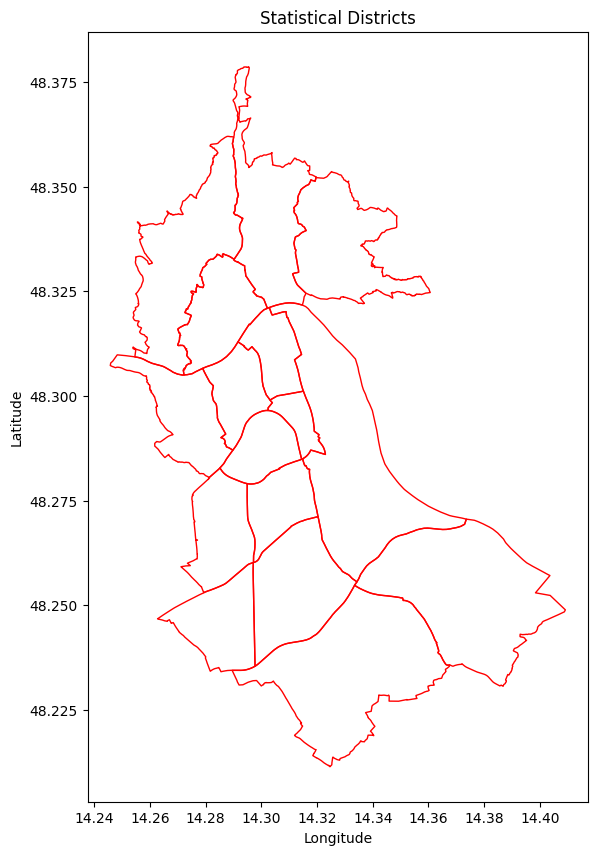

In [ ]:
# Load the statistical districts
statistical_districts = gpd.read_file(r'Urban Data Science/Day 1/Data/Linz Statistical districts/Statistische_Bezirke_20250428.shp')

statistical_districts = statistical_districts.to_crs(epsg=4326)

# Plot the layers
fig, ax = plt.subplots(figsize=(12, 10))


# Plot statistical districts
statistical_districts.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=1, label='Statistical Districts')


# Add title and labels
ax.set_title('Statistical Districts')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add legend
#ax.legend()

# Show the plot
plt.show()

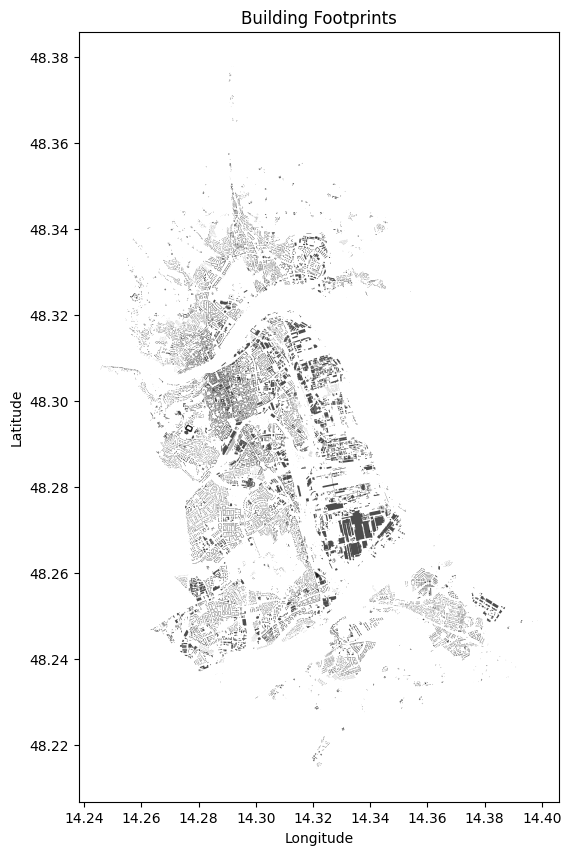

In [ ]:
# Load the building layer
buildings = gpd.read_file(r'Urban Data Science/Day 1/Data/Austria_buildings/Build/Austria_Build.shp')

buildings = buildings.to_crs(epsg=4326)

# Plot the layers
fig, ax = plt.subplots(figsize=(12, 10))


# Plot buildings
buildings.plot(ax=ax, color='black', alpha=0.7, label='Buildings')

# Add title and labels
ax.set_title('Building Footprints')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add legend
#ax.legend()

# Show the plot
plt.show()

## Now lets Overlay the Boundary on Buildings

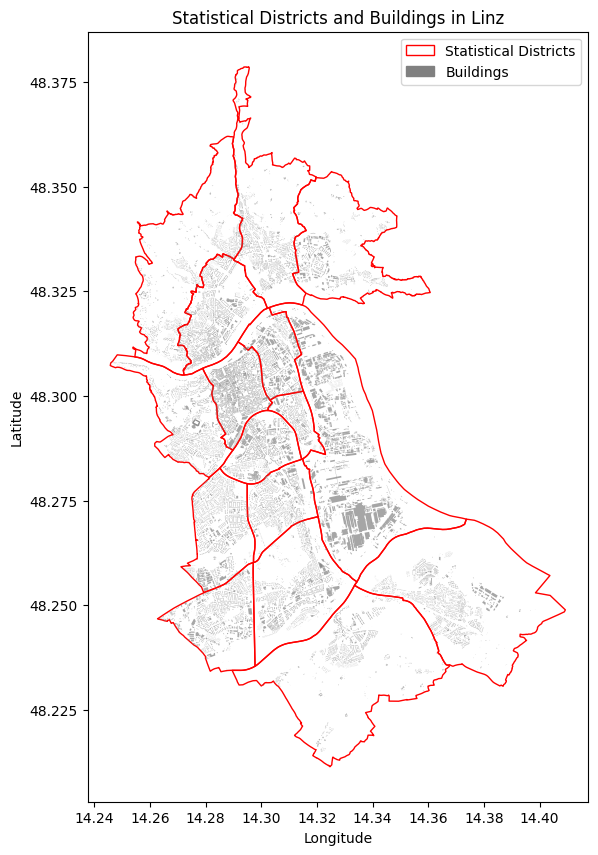

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Plot the layers
fig, ax = plt.subplots(figsize=(12, 10))


# Plot statistical districts
statistical_districts.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=1, label='Statistical Districts')

# Plot buildings
buildings.plot(ax=ax, color='gray', alpha=0.7, label='Buildings')

# Add title and labels
ax.set_title('Statistical Districts and Buildings in Linz')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add legend
#ax.legend()

# Create custom legend manually
legend_patches = [
    mpatches.Patch(edgecolor='red', facecolor='none', label='Statistical Districts'),
    mpatches.Patch(color='gray', label='Buildings')
]

# Add legend
ax.legend(handles=legend_patches)